##**LOADING LIBRARIES**

In [ ]:
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sn
import tensorflow as tf


# **SETTING PATH**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_path = '/content/drive/MyDrive/CS114/predict_food/Machine Learning/data/hog_features.npy'
y_path = '/content/drive/MyDrive/CS114/predict_food/Machine Learning/data/labels.npy'
hog_img_path = '/content/drive/MyDrive/CS114/predict_food/Machine Learning/data/hog_images.npy'

#**PREPARING DATASET**

## **I. HOG Feature extraction:**

In [ ]:
directory = '/content/drive/MyDrive/CS114/predict_food/data_new'
os.chdir(directory)
food = os.listdir()

hog_images = []
hog_features = []
for i in range(0,len(food)):
  path = glob.glob("/content/drive/MyDrive/CS114/predict_food/data_new/" + food[i] + '/*')

  print(i)
  for p in path:
    img = cv2.imread(p, 0)
    img = cv2.resize(img,(224,224))
    ppc = 16
    fd,hog_image = hog(img, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

np.save(X_path, np.array(hog_features))
np.save(hog_img_path, np.array(hog_images))

## **II. Data splitting:**

In [ ]:
X = np.load(X_path)
y = np.load(y_path)
print(X.shape)
print(y.shape)

(23178, 15488)
(23178,)


In [ ]:
hog_images = np.load(hog_img_path)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size =0.2, random_state = 100, shuffle = True)

#**TRAINNING MODEL**

In [ ]:
model = svm.SVC(C = 3, degree = 7)
model.fit(X_train, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=7, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pkl_filename = "/content/drive/MyDrive/CS114/predict_food/Machine Learning/SVM/SVM.pkl"
with open(pkl_filename, 'wb') as file:
    #pickle.dump(model, file)

#**EVALUATION**

## **I. Accuracy:**

In [ ]:
pkl_filename = "/content/drive/MyDrive/CS114/predict_food/Machine Learning/SVM/SVM.pkl"
with open(pkl_filename, 'rb') as file:
  model = pickle.load(file)

In [ ]:
print("Accuracy train: ", model.score(X_train, y_train))
print("Accuracy test: ", model.score(X_test, y_test))

Accuracy train:  0.7589796138496386
Accuracy test:  0.21484037963761865


## **II. Classification report:**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
directory = '/content/drive/MyDrive/CS114/predict_food/data_new'
os.chdir(directory)
class_names = os.listdir()
print(classification_report(y_pred, y_test, target_names= class_names))

                  precision    recall  f1-score   support

        banh_beo       0.06      0.50      0.11        14
    banh_bot_loc       0.03      0.24      0.05        17
        banh_can       0.18      0.15      0.17       164
       banh_cuon       0.17      0.18      0.17       243
        banh_gio       0.10      0.34      0.16        44
       banh_khot       0.09      0.10      0.09       122
         banh_mi       0.62      0.26      0.36       576
   banh_mi_nuong       0.13      0.79      0.22        14
banh_trang_nuong       0.18      0.23      0.20       135
 banh_trang_tron       0.29      0.46      0.36        67
        banh_xeo       0.26      0.16      0.20       407
         bap_xao       0.14      0.23      0.17        75
       bot_chien       0.20      0.16      0.18       154
      bun_bo_hue       0.46      0.19      0.27       745
         bun_cha       0.01      0.14      0.02         7
 bun_dau_mam_tom       0.29      0.18      0.23       311
  bun_thit_nu

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **III. Confusion matrix:**

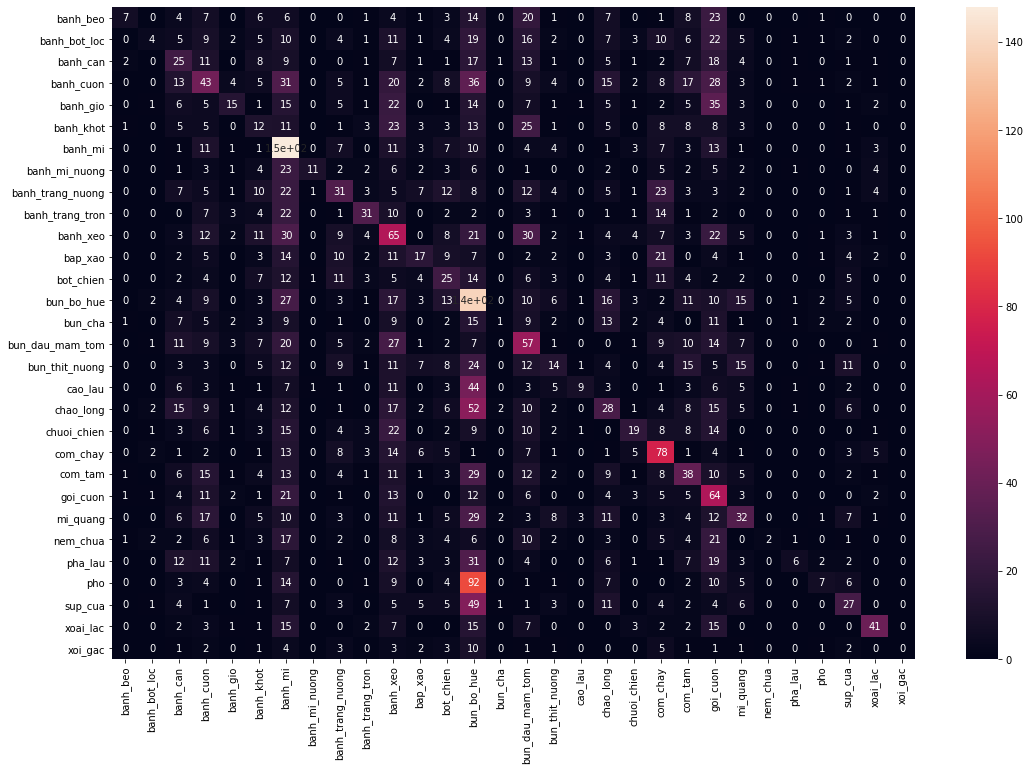

In [ ]:
directory = '/content/drive/MyDrive/CS114/predict_food/data_new'
os.chdir(directory)
class_names = os.listdir()
matrix = np.array(tf.math.confusion_matrix(y_test, y_pred))

df_cm = pd.DataFrame(matrix, 
                  index = class_names,
                  columns = class_names)
plt.figure(figsize = (18,12))
sn.heatmap(df_cm, annot=True)